Архипов Дмитрий Алексеевич ИВТ-М20.

Импорт всех необходимых библиотек.

In [425]:
import numpy as np
from pandas import (
DataFrame,
read_csv
)
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt


Считываем данные в датафреймы. Для таргета переименовываем колонку для упрощения обращения к оной.

In [426]:
target = DataFrame(read_csv('data/target1.csv', header=0))
target.columns = ['index']
var = DataFrame(read_csv('data/var1.csv', sep=',', header=None))

Трнаспонирование матрицы. Каждый столбец будет спектром с 200 частотами.

In [427]:
varT = var.T


Начало и конец для исходных матриц, и для транспонированой матрицы.

In [428]:
target.head()

,index
0,1
1,1
2,1
3,1
4,1


In [429]:
target.tail()

,index
55,2
56,2
57,2
58,2
59,2


In [430]:
var.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,10.660937,8.837976,4.869347,3.841726,2.965282,2.585869,3.414604,2.776011,2.963440,3.396503,...,2.359887,5.101552,5.520378,4.311072,2.429624,3.125680,4.389479,3.460729,4.470180,3.668878
1,9.266645,8.422462,5.690374,5.288656,5.558424,1.955015,5.256587,2.869178,5.321209,4.062427,...,4.120480,4.008890,4.983994,4.199580,5.584557,3.267026,4.359180,2.608956,3.903345,3.358269
2,8.163384,7.887574,4.825932,6.759585,7.383261,2.026191,5.790233,3.270219,6.022476,4.891155,...,5.177092,2.816580,4.084300,4.298150,7.288995,3.029492,3.221400,2.454002,2.881283,2.952321
3,9.291998,8.345648,5.327111,5.093615,5.726576,2.237053,5.256456,1.985642,4.491476,3.652527,...,3.178321,3.634702,5.196330,4.008867,3.669536,2.656386,3.272562,3.670229,3.905332,4.054018
4,6.683817,6.691520,5.066057,3.972489,3.536099,4.918929,5.183136,4.471352,5.292276,4.060147,...,4.773993,4.965216,6.597458,3.211081,4.389846,3.623183,6.670483,3.329430,5.923117,2.557104


In [431]:
var.tail()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
55,11.920297,10.279770,5.004289,5.714130,4.168375,4.954103,3.960152,4.354246,3.533010,6.294323,...,4.196200,4.480648,4.631163,4.097790,2.889446,4.277942,3.419940,3.798945,5.081380,3.675210
56,14.603030,12.307543,5.179977,8.198934,7.285317,2.312230,3.968575,4.039847,2.768812,7.655651,...,4.398523,4.099560,1.928128,6.484316,7.382759,4.348785,1.252499,3.023498,2.009719,4.156490
57,11.889351,10.415799,5.502083,5.684873,4.038633,4.296066,4.154743,4.565117,3.770575,6.477043,...,4.743383,5.140709,4.465879,4.001583,4.049829,3.725290,3.879549,2.883247,4.607514,2.993956
58,14.830939,11.954417,4.161920,6.599443,4.331671,3.026738,2.149045,4.661237,0.976469,6.946828,...,3.339567,5.464532,2.627844,6.448275,5.388185,4.228943,2.285904,3.233596,2.606208,3.659502
59,11.112254,9.536774,4.537337,5.745666,4.044630,3.848304,3.572943,4.752922,4.225175,5.779746,...,4.570158,4.354833,4.360597,4.437203,4.744892,4.476239,4.139352,2.703587,4.451271,2.902575


In [432]:
varT.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,10.660937,9.266645,8.163384,9.291998,6.683817,11.054668,9.368904,12.977878,9.236626,9.840215,...,11.857264,12.895890,13.134568,11.802193,11.962313,11.920297,14.603030,11.889351,14.830939,11.112254
1,8.837976,8.422462,7.887574,8.345648,6.691520,9.338379,8.224688,10.295674,8.447220,8.515675,...,11.250785,11.053541,11.016023,10.137686,10.282155,10.279770,12.307543,10.415799,11.954417,9.536774
2,4.869347,5.690374,4.825932,5.327111,5.066057,4.523733,3.887042,4.310234,6.397357,4.260144,...,7.492301,4.580788,4.626027,3.874202,6.084810,5.004289,5.179977,5.502083,4.161920,4.537337
3,3.841726,5.288656,6.759585,5.093615,3.972489,6.223527,5.677149,5.818557,4.914216,5.444044,...,8.328328,6.967320,7.288541,6.296687,5.517580,5.714130,8.198934,5.684873,6.599443,5.745666
4,2.965282,5.558424,7.383261,5.726576,3.536099,6.199316,4.605147,4.160739,4.578611,4.327908,...,9.765597,5.642737,7.000405,4.284659,6.005416,4.168375,7.285317,4.038633,4.331671,4.044630


In [433]:
varT.tail()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
195,3.125680,3.267026,3.029492,2.656386,3.623183,4.330039,4.331383,6.165689,6.248261,4.214335,...,5.077341,4.567783,4.389208,3.262275,4.388935,4.277942,4.348785,3.725290,4.228943,4.476239
196,4.389479,4.359180,3.221400,3.272562,6.670483,2.454472,4.387610,3.925381,7.037519,4.579577,...,3.234667,2.214661,2.054102,3.423455,3.866602,3.419940,1.252499,3.879549,2.285904,4.139352
197,3.460729,2.608956,2.454002,3.670229,3.329430,3.826743,2.942408,3.113872,2.900196,2.598997,...,4.024269,4.336321,4.026444,2.767669,4.792355,3.798945,3.023498,2.883247,3.233596,2.703587
198,4.470180,3.903345,2.881283,3.905332,5.923117,3.707086,4.124207,4.378209,6.493159,4.002899,...,3.596307,4.084645,2.264698,2.674313,4.188550,5.081380,2.009719,4.607514,2.606208,4.451271
199,3.668878,3.358269,2.952321,4.054018,2.557104,4.528353,2.878989,4.157906,3.649004,2.838819,...,5.109505,4.196226,4.674658,2.420840,5.326448,3.675210,4.156490,2.993956,3.659502,2.902575


График врменных реализаций каждого спектра.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

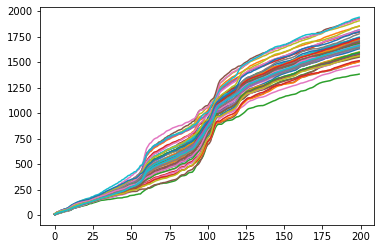

In [434]:
varCS = varT.cumsum(axis=0)
plt.figure()
varCS.plot(legend=False)

График временной реализации для двух случайных спектров

<AxesSubplot:>

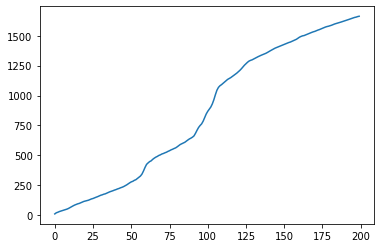

In [435]:
varCS[59].plot(legend=False)

<AxesSubplot:>

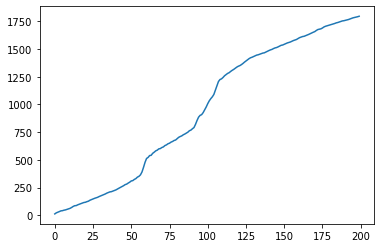

In [436]:
varCS[13].plot(legend=False)


Мощность каждого спектра.

In [437]:
varPower = round(varT.sum(axis = 0), 1)
print(varPower)


0     1655.2
1     1796.4
2     1730.1
3     1681.8
4     1659.5
5     1664.4
6     1634.7
7     1738.3
8     1905.2
9     1689.1
10    1631.4
11    1851.7
12    1560.7
13    1796.3
14    1704.3
15    1926.6
16    1922.2
17    1640.7
18    1663.7
19    1744.8
20    1696.5
21    1591.1
22    1383.6
23    1713.9
24    1816.9
25    1549.5
26    1468.2
27    1661.7
28    1671.7
29    1686.3
30    1740.8
31    1684.9
32    1717.4
33    1582.8
34    1689.1
35    1507.8
36    1575.4
37    1715.1
38    1602.2
39    1940.3
40    1591.9
41    1723.7
42    1684.8
43    1732.3
44    1650.9
45    1696.4
46    1810.3
47    1777.6
48    1855.2
49    1666.0
50    1798.3
51    1504.3
52    1595.8
53    1514.8
54    1671.5
55    1576.4
56    1663.7
57    1647.3
58    1561.5
59    1662.4
dtype: float64


График распределения целевой переменной target. И фиксация начала кризиса.

30


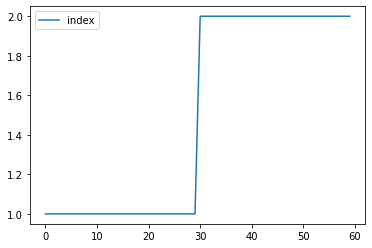

In [438]:
target.plot()
targetTimed = target
targetTimed['time'] = target.index
#print(target)
crysisLine = targetTimed[targetTimed['index']>=2].iloc[0]['time']
print(crysisLine)


График мощности спектра с указанием начала кризиса.

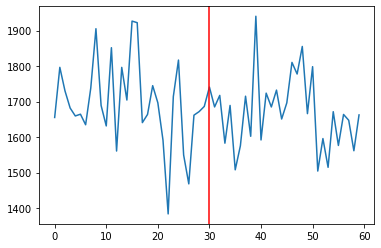

In [439]:
varplot = varPower.plot()
varplot.axvline(x = crysisLine, color='r')


Описательные статистики мощностей до и после начала кризиса.

In [440]:
varPowerBefore = varPower[0:crysisLine]
varPowerAfter = varPower[crysisLine:]
varPower.describe()


count      60.000000
mean     1682.956667
std       112.291545
min      1383.600000
25%      1624.100000
50%      1676.750000
75%      1733.800000
max      1940.300000
dtype: float64

In [441]:
varPBboxplot = varPowerBefore.describe()
print(varPBboxplot)

count      30.000000
mean     1694.550000
std       121.933271
min      1383.600000
25%      1644.325000
50%      1684.050000
75%      1743.175000
max      1926.600000
dtype: float64


In [442]:
varPAboxplot = varPowerAfter.describe()
print(varPAboxplot)


count      30.000000
mean     1671.363333
std       102.507492
min      1504.300000
25%      1592.875000
50%      1668.750000
75%      1722.125000
max      1940.300000
dtype: float64


Длбавление к графику средние значения мощности спектра до кризиса и после.

1671.3633333333335
1694.5499999999997


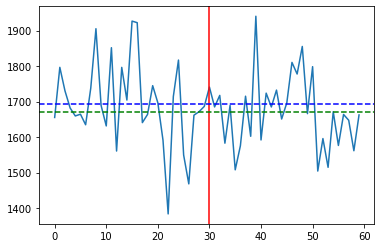

In [443]:
print(varPowerAfter.mean())
print(varPowerBefore.mean())

varplot = varPower.plot()
varplot.axvline(x = crysisLine, color='r')
varplot.axhline(y = varPowerAfter.mean(), color='g', linestyle = '--')
varplot.axhline(y = varPowerBefore.mean(), color='b', linestyle = '--')


График боксплотов мощности спектра до кризиса и после.

{'whiskers': [<matplotlib.lines.Line2D at 0x12fb6023fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x12fbb53f988>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fbb55bc88>,
 'medians': [<matplotlib.lines.Line2D at 0x12fb4d8ee88>,
 'fliers': [<matplotlib.lines.Line2D at 0x12fb4d8ee48>,
 'means': []}

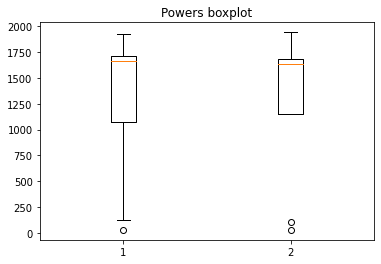

In [444]:
data = [varPBboxplot, varPAboxplot]
fig1, ax1 = plt.subplots()
ax1.set_title('Powers boxplot')
ax1.boxplot(data)


По итогу за счет графика временной реализации спектров можно заметить ступенчатый переход в частотах.
Из графиков мощности не удалось подчерпнуть полезной информации.
Аналогичная ситуация с боксплотами.

Работа с частотой спектра.

Находим среднюю частоту спектра.

In [445]:
varFreq = round(varT.pow(2).sum(axis = 0), 1)
varPowerFrequency = round(varFreq/varPower, 1)
print(varPowerFrequency)


0     15.1
1     15.6
2     14.0
3     14.6
4     14.1
5     14.2
6     13.2
7     15.5
8     17.5
9     13.9
10    14.0
11    16.1
12    13.3
13    15.6
14    15.3
15    18.3
16    18.7
17    13.3
18    15.0
19    14.4
20    15.8
21    13.6
22    16.0
23    16.0
24    16.8
25    13.4
26    12.7
27    14.3
28    13.9
29    14.5
30    15.9
31    13.1
32    12.9
33    16.1
34    13.2
35    18.5
36    15.5
37    14.2
38    13.4
39    15.0
40    13.3
41    15.0
42    13.3
43    13.4
44    14.4
45    15.6
46    14.1
47    14.2
48    14.8
49    12.9
50    14.3
51    15.4
52    14.2
53    14.8
54    13.2
55    13.5
56    15.8
57    13.6
58    16.6
59    13.4
dtype: float64


График частоты с указанием момнта началы кризиса.

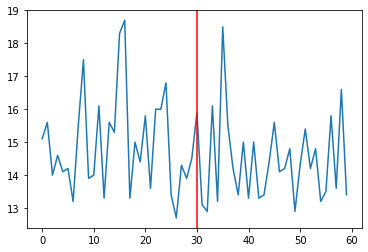

In [446]:
varplot = varPowerFrequency.plot()
varplot.axvline(x = crysisLine, color='r')


Описательные статистики частот до и после начала кризиса.

In [447]:
varPowerFreqBefore = varPowerFrequency[0:crysisLine]
varPowerFreqAfter = varPowerFrequency[crysisLine:]
varPowerFrequency.describe()

count    60.000000
mean     14.705000
std       1.415462
min      12.700000
25%      13.475000
50%      14.350000
75%      15.600000
max      18.700000
dtype: float64

In [448]:
varPBFreqboxplot = varPowerFreqBefore.describe()
print(varPBboxplot)

count      30.000000
mean     1694.550000
std       121.933271
min      1383.600000
25%      1644.325000
50%      1684.050000
75%      1743.175000
max      1926.600000
dtype: float64


In [449]:
varPAFreqboxplot = varPowerFreqAfter.describe()
print(varPAboxplot)


count      30.000000
mean     1671.363333
std       102.507492
min      1504.300000
25%      1592.875000
50%      1668.750000
75%      1722.125000
max      1940.300000
dtype: float64


Добавление к существующему графику средних значений частот до и после кризиса.

14.453333333333335
14.956666666666665


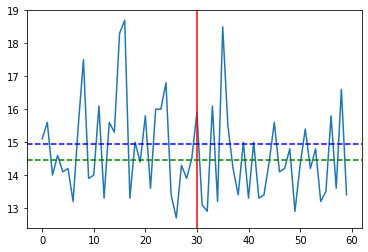

In [450]:
print(varPowerFreqAfter.mean())
print(varPowerFreqBefore.mean())

varplot = varPowerFrequency.plot()
varplot.axvline(x = crysisLine, color='r')
varplot.axhline(y = varPowerFreqAfter.mean(), color='g', linestyle = '--')
varplot.axhline(y = varPowerFreqBefore.mean(), color='b', linestyle = '--')


График боксплотов частот до и после кризиса

{'whiskers': [<matplotlib.lines.Line2D at 0x12fb86cc3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x12fb86b7a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fb86d2c08>,
 'medians': [<matplotlib.lines.Line2D at 0x12fb6bebe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x12fb6bebe08>,
 'means': []}

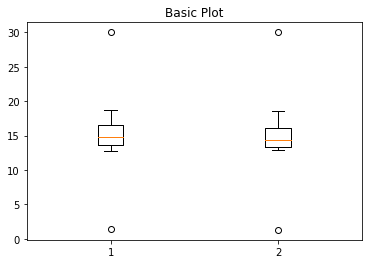

In [452]:
data = [varPBFreqboxplot, varPAFreqboxplot]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

По итогу:
Из графиков мощности не удалось подчерпнуть полезной информации.
Аналогичная ситуация с боксплотами.

График мощностей и частот с указанием в каких точках начался кризис

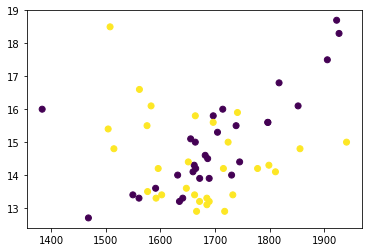

In [335]:
fig, ax = plt.subplots()
ax.scatter(varPower, varPowerFrequency, c=target['index'])

Графики двух случайных частот.

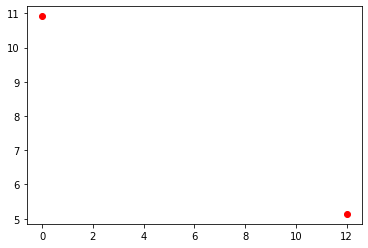

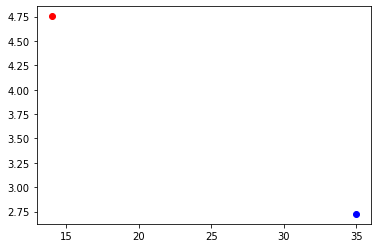

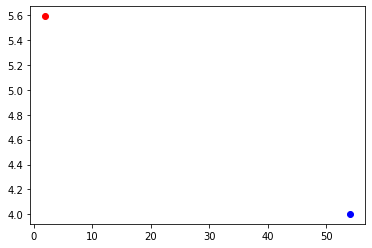

In [369]:
fig, ax = plt.subplots()
ax.scatter(0, varT[0][125], c='r')
ax.scatter(12, varT[12][36], c='r')

fig, ax = plt.subplots()
ax.scatter(14, varT[14][146], c='r')
ax.scatter(35, varT[35][78], c='b')

fig, ax = plt.subplots()
ax.scatter(54, varT[54][183], c='b')
ax.scatter(2, varT[2][136], c='r')


Применения 3-х методов кластеризации.

In [409]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(varT)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [414]:
clustering = AgglomerativeClustering(n_clusters=2).fit(varT)
clustering
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [424]:
clustering = SpectralBiclustering(n_clusters=2, random_state=0).fit(varT)
clustering.row_labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [423]:
clustering.column_labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Вопросы.

1.	Какие существуют алгоритмы кластерного анализа данных?

Кластеризация (или кластерный анализ) — это задача разбиения множества объектов на группы, называемые кластерами. Внутри каждой группы должны оказаться «похожие» объекты, а объекты разных группы должны быть как можно более отличны. Главное отличие кластеризации от классификации состоит в том, что перечень групп четко не задан и определяется в процессе работы алгоритма.
Алгоритмы иерархической кластеризации

a) Алгоритмы иерархической кластеризации

Среди алгоритмов иерархической кластеризации выделяются два основных типа: восходящие и нисходящие алгоритмы. Нисходящие алгоритмы работают по принципу «сверху-вниз»: в начале все объекты помещаются в один кластер, который затем разбивается на все более мелкие кластеры. Более распространены восходящие алгоритмы, которые в начале работы помещают каждый объект в отдельный кластер, а затем объединяют кластеры во все более крупные, пока все объекты выборки не будут содержаться в одном кластере. Таким образом строится система вложенных разбиений. Результаты таких алгоритмов обычно представляют в виде дерева – дендрограммы. Классический пример такого дерева – классификация животных и растений.

Для вычисления расстояний между кластерами чаще все пользуются двумя расстояниями: одиночной связью или полной связью (см. обзор мер расстояний между кластерами).

К недостатку иерархических алгоритмов можно отнести систему полных разбиений, которая может являться излишней в контексте решаемой задачи.

б)  Алгоритм выделения связных компонент

В алгоритме выделения связных компонент задается входной параметр R и в графе удаляются все ребра, для которых «расстояния» больше R. Соединенными остаются только наиболее близкие пары объектов. Смысл алгоритма заключается в том, чтобы подобрать такое значение R, лежащее в диапазон всех «расстояний», при котором граф «развалится» на несколько связных компонент. Полученные компоненты и есть кластеры.

Для подбора параметра R обычно строится гистограмма распределений попарных расстояний. В задачах с хорошо выраженной кластерной структурой данных на гистограмме будет два пика – один соответствует внутрикластерным расстояниям, второй – межкластерным расстояния. Параметр R подбирается из зоны минимума между этими пиками. При этом управлять количеством кластеров при помощи порога расстояния довольно затруднительно.

в) Алгоритм выделения связных компонент

В алгоритме выделения связных компонент задается входной параметр R и в графе удаляются все ребра, для которых «расстояния» больше R. Соединенными остаются только наиболее близкие пары объектов. Смысл алгоритма заключается в том, чтобы подобрать такое значение R, лежащее в диапазон всех «расстояний», при котором граф «развалится» на несколько связных компонент. Полученные компоненты и есть кластеры.

Для подбора параметра R обычно строится гистограмма распределений попарных расстояний. В задачах с хорошо выраженной кластерной структурой данных на гистограмме будет два пика – один соответствует внутрикластерным расстояниям, второй – межкластерным расстояния. Параметр R подбирается из зоны минимума между этими пиками. При этом управлять количеством кластеров при помощи порога расстояния довольно затруднительно.